In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import f_classif, chi2

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from gpalib import preprocessing as gpa_prep
from gpalib import analysis as gpa_analysis

In [2]:
"""Display settings"""
pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_columns = 300

In [3]:
data = pd.read_csv('../data/russia-16-19-v2.4.csv')
print(data.shape)
data.head()

(308273, 205)


,cntrID,sup_cntr_num,sup_running_cntr_num,sup_cntr_avg_price,sup_cntr_avg_penalty_share,sup_no_pnl_share,sup_1s_sev,sup_1s_org_sev,sup_sim_price_share,sup_ter,sup_good_cntr_share,sup_fed_cntr_share,sup_sub_cntr_share,sup_mun_cntr_share,org_cntr_num,org_running_cntr_num,org_cntr_avg_price,org_1s_sev,org_1s_sup_sev,org_sim_price_share,org_type,org_ter,org_good_cntr_share,org_fed_cntr_share,org_sub_cntr_share,org_mun_cntr_share,cntr_num_together,okpd_cntr_num,okpd_good_share_min,okpd_good_share_mean,okpd_good_share_max,sign_month,sign_quarter,cntr_okpd_num,plan_cntr_len,day_price,purch_type,cntr_lvl,price_higher_pmp,price_too_low,pmp,price,okpd2_0,okpd2_10,okpd2_11,okpd2_12,okpd2_13,okpd2_14,okpd2_15,okpd2_16,okpd2_17,okpd2_18,okpd2_19,okpd2_20,okpd2_21,okpd2_22,okpd2_23,okpd2_24,okpd2_25,okpd2_26,okpd2_27,okpd2_28,okpd2_29,okpd2_30,okpd2_31,okpd2_32,okpd2_33,okpd2_35,okpd2_36,okpd2_37,okpd2_38,okpd2_39,okpd2_41,okpd2_42,okpd2_43,okpd2_45,okpd2_46,okpd2_47,okpd2_49,okpd2_50,okpd2_51,okpd2_52,okpd2_53,okpd2_55,okpd2_56,okpd2_58,okpd2_59,okpd2_60,okpd2_61,okpd2_62,okpd2_63,okpd2_64,okpd2_65,okpd2_66,okpd2_68,okpd2_69,okpd2_70,okpd2_71,okpd2_72,okpd2_73,okpd2_74,okpd2_75,okpd2_77,okpd2_78,okpd2_79,okpd2_80,okpd2_81,okpd2_82,okpd2_84,okpd2_85,okpd2_86,okpd2_87,okpd2_88,okpd2_89,okpd2_90,okpd2_91,okpd2_93,okpd2_94,okpd2_95,okpd2_96,okpd2_97,okpd2_98,okpd2_99,socs_0,socs_10,socs_11,socs_12,socs_13,socs_14,socs_15,socs_16,socs_17,socs_18,socs_19,socs_20,socs_21,socs_22,socs_23,socs_24,socs_25,socs_26,socs_27,socs_28,socs_29,socs_30,socs_31,socs_32,socs_33,socs_35,socs_36,socs_37,socs_38,socs_39,socs_41,socs_42,socs_43,socs_45,socs_46,socs_47,socs_49,socs_50,socs_51,socs_52,socs_53,socs_55,socs_56,socs_58,socs_59,socs_60,socs_61,socs_62,socs_63,socs_64,socs_65,socs_66,socs_68,socs_69,socs_70,socs_71,socs_72,socs_73,socs_74,socs_75,socs_77,socs_78,socs_79,socs_80,socs_81,socs_82,socs_84,socs_85,socs_86,socs_87,socs_88,socs_89,socs_90,socs_91,socs_93,socs_94,socs_95,socs_96,socs_97,socs_98,socs_99,cntr_result
0,40616012,14,5,237956,0.000,1,0,0,0.071,nan,0.643,0.071,0.571,0.357,65,31,74882,0,0,0.185,18,"67,664.000",0.662,0.000,0.000,1.000,2,79085,0.542,0.542,0.542,5,2,1,81,316.667,4,3,0,0,0,25650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.429,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0
1,40082514,45,123,888294,0.000,1,0,0,0.067,nan,0.778,0.400,0.222,0.378,231,153,250271,0,0,0.113,30,"67,180.000",0.883,0.000,1.000,0.000,1,244000,0.538,0.538,0.538,3,1,1,289,262.976,6,2,0,0,0,76000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.511,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
2,41027864,17,5,1032110,0.000,1,0,0,0.882,"46,302.000",0.941,0.000,0.000,1.000,22,15,587344,0,0,0.091,16,"52,601.000",0.818,0.000,0.000,1.000,1,22827,0.640,0.640,0.640,5,2,1,220,"4,061.405",1,3,0,0,0,893509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
num_var01, num_var, cat_bin_var, cat_var = gpa_analysis.group_variables(data)

### Quantitative variables with values between [0, 1] (Q01)

In [5]:
# Descriptive statistics
data[num_var01].describe()

,sup_cntr_avg_penalty_share,sup_no_pnl_share,sup_1s_sev,sup_1s_org_sev,sup_sim_price_share,sup_good_cntr_share,sup_fed_cntr_share,sup_sub_cntr_share,sup_mun_cntr_share,org_1s_sev,org_1s_sup_sev,org_sim_price_share,org_good_cntr_share,org_fed_cntr_share,org_sub_cntr_share,org_mun_cntr_share,okpd_good_share_min,okpd_good_share_mean,okpd_good_share_max
count,"308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000"
mean,0.003,0.871,0.000,0.000,0.303,0.825,0.241,0.436,0.323,0.000,0.000,0.123,0.814,0.236,0.432,0.331,0.586,0.587,0.589
std,0.017,0.336,0.000,0.000,0.317,0.253,0.348,0.416,0.384,0.000,0.000,0.116,0.237,0.425,0.495,0.471,0.047,0.046,0.047
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.393,0.393,0.393
25%,0.000,1.000,0.000,0.000,0.087,0.732,0.000,0.000,0.000,0.000,0.000,0.061,0.762,0.000,0.000,0.000,0.538,0.538,0.538
50%,0.000,1.000,0.000,0.000,0.158,0.959,0.038,0.278,0.081,0.000,0.000,0.095,0.913,0.000,0.000,0.000,0.590,0.590,0.590
75%,0.000,1.000,0.000,0.000,0.400,1.000,0.350,0.970,0.667,0.000,0.000,0.143,0.976,0.000,1.000,1.000,0.617,0.619,0.626
max,0.963,1.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.830,0.830,0.830


**Findings:**
- Variables `sup_1s_sev`, `sup_1s_org_sev`, `org_1s_sev1`, `org_1s_sup_sev` are useless because they cave constant value equal to 0. Nor customer neigher supplier  practice one-sided contract termination.

In [6]:
# Deleting useless variables
list_of_vars = [
    'sup_1s_sev', 
    'sup_1s_org_sev', 
    'org_1s_sev', 
    'org_1s_sup_sev'
]

for var in list_of_vars:
    num_var01.remove(var)

In [7]:
# gpa_analysis.plot_outliers(num_var01, data)

Saved picture is uploaded because it takes a lot of time to plot chart<br>
**Sorted values and sorted values in [1, 99] percentiles**

![](png/outliers_num_var01.png)

**Findings:**
- Outliers are evident for `okpd_good_share_max`, `okpd_good_share_mean`, `okpd_good_share_min`, `sup_cntr_avg_penalty_share`, `org_sim_price_share`
- Some variables have only two values: `org_fed_cntr_share`, `org_sub_cntr_share`, `org_mun_cntr_share`. This means that public organization belongs only to one level (federal, regional, municipal). So, these variables might be redundant because contract level is shown by `cntr_lvl`

In [8]:
# Correlation matrix
data[num_var01].corr()

,sup_cntr_avg_penalty_share,sup_no_pnl_share,sup_sim_price_share,sup_good_cntr_share,sup_fed_cntr_share,sup_sub_cntr_share,sup_mun_cntr_share,org_sim_price_share,org_good_cntr_share,org_fed_cntr_share,org_sub_cntr_share,org_mun_cntr_share,okpd_good_share_min,okpd_good_share_mean,okpd_good_share_max
sup_cntr_avg_penalty_share,1.000,-0.471,-0.087,0.000,-0.045,0.074,-0.039,-0.031,-0.008,-0.035,0.060,-0.031,0.017,0.016,0.015
sup_no_pnl_share,-0.471,1.000,0.217,-0.005,0.103,-0.122,0.038,0.013,0.035,0.086,-0.104,0.032,0.030,0.033,0.035
sup_sim_price_share,-0.087,0.217,1.000,0.040,0.160,-0.079,-0.060,0.053,0.106,0.134,-0.064,-0.054,0.274,0.272,0.263
sup_good_cntr_share,0.000,-0.005,0.040,1.000,0.022,0.099,-0.128,-0.061,0.529,0.027,0.086,-0.115,0.331,0.331,0.322
sup_fed_cntr_share,-0.045,0.103,0.160,0.022,1.000,-0.506,-0.358,-0.096,0.087,0.817,-0.420,-0.296,0.047,0.046,0.043
sup_sub_cntr_share,0.074,-0.122,-0.079,0.099,-0.506,1.000,-0.624,-0.145,0.033,-0.406,0.836,-0.514,0.131,0.135,0.135
sup_mun_cntr_share,-0.039,0.038,-0.060,-0.128,-0.358,-0.624,1.000,0.244,-0.115,-0.301,-0.524,0.823,-0.184,-0.187,-0.185
org_sim_price_share,-0.031,0.013,0.053,-0.061,-0.096,-0.145,0.244,1.000,-0.109,-0.141,-0.154,0.290,-0.093,-0.094,-0.093
org_good_cntr_share,-0.008,0.035,0.106,0.529,0.087,0.033,-0.115,-0.109,1.000,0.117,0.058,-0.167,0.238,0.235,0.225
org_fed_cntr_share,-0.035,0.086,0.134,0.027,0.817,-0.406,-0.301,-0.141,0.117,1.000,-0.485,-0.391,0.045,0.045,0.044


**Findings:**
- `okpd_good_share_min`, `okpd_good_share_mean`, `okpd_good_share_max` has a correlation coefficient over 92%. This is a multicollinearity, this will decrease quality of models based on logistic regression and neural network. So, only one of variable should be left

In [9]:
# Correlation with `cntr_result`
data[num_var01].corrwith(data.cntr_result)

sup_cntr_avg_penalty_share   -0.009
sup_no_pnl_share              0.022
sup_sim_price_share          -0.103
sup_good_cntr_share          -0.609
sup_fed_cntr_share           -0.021
sup_sub_cntr_share           -0.138
sup_mun_cntr_share            0.168
org_sim_price_share           0.075
org_good_cntr_share          -0.437
org_fed_cntr_share           -0.041
org_sub_cntr_share           -0.123
org_mun_cntr_share            0.167
okpd_good_share_min          -0.360
okpd_good_share_mean         -0.358
okpd_good_share_max          -0.346
dtype: float64

**Findings:**
- `org_good_cntr_share`, `sup_good_cntr_share`, `okpd_good_share_min` has the highest correlation with target variable `cntr_result`
- `sup_cntr_avg_penalty_share`, `sup_fed_cntr_share`, `sup_no_pnl_share` has the lowest correlation with target variable

In [10]:
# Deleting useless variables
list_of_vars = [
    'org_fed_cntr_share', 
    'org_sub_cntr_share', 
    'org_mun_cntr_share'
]

for var in list_of_vars:
    num_var01.remove(var)

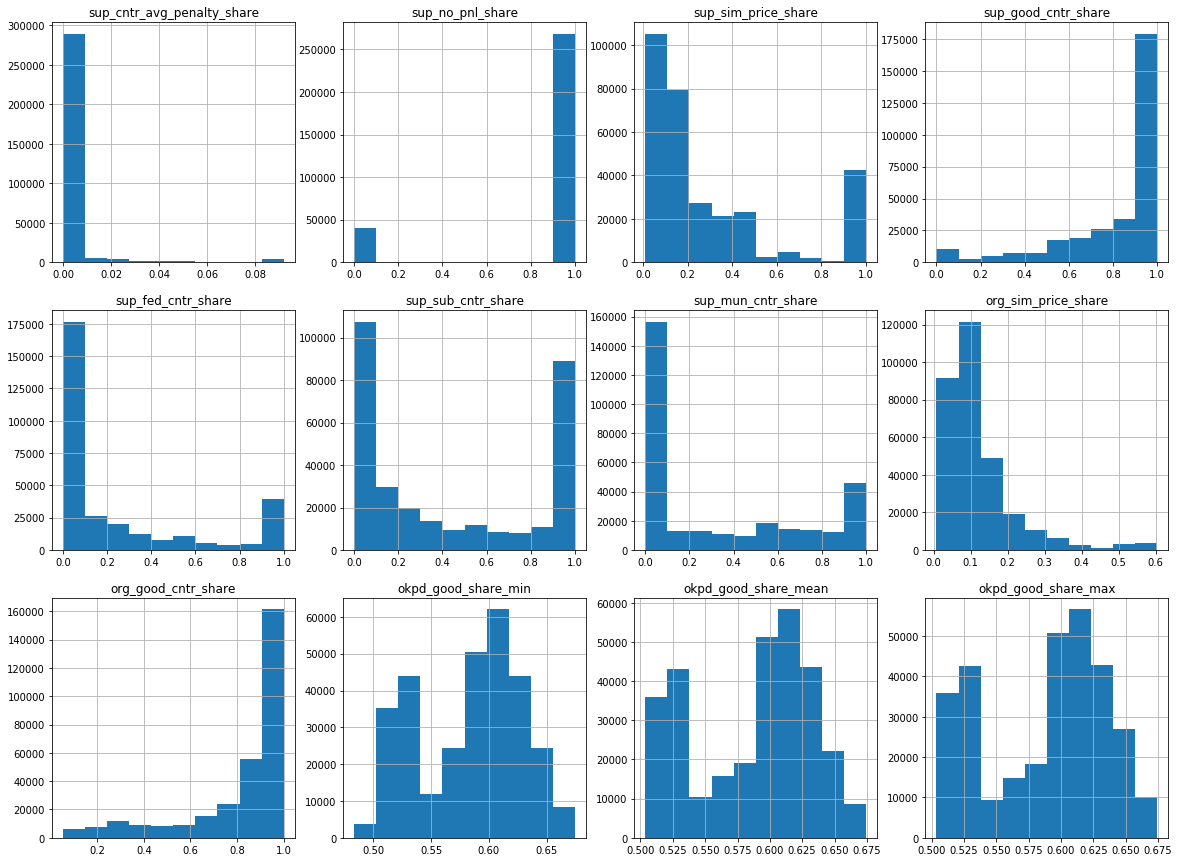

In [11]:
gpa_analysis.plot_histograms(num_var01, data)

**Findings:**
- `sup_good_cntr_share`, `org_good_cntr_share` has positive skew. This is because the more contracts supplier / customer has finished, the more likely contract will be good. And in current sample good contracts are about 75% of all sample.
- `sup_cntr_avg_penalty_share`, `sup_mun_cntr_share`, `sup_fed_cntr_share`, `sup_sub_cntr_share`, `org_sim_price_share` has negative skew.


In [12]:
# Model independent test to rate feature importance (ANOVA test)
res_df, res_list = gpa_analysis.rate_feature_importance(
    data[num_var01].values, 
    data.cntr_result.values, 
    [f_classif], 
    ['f_score'], 
    num_var01
)
res_df

,var_name,f_score
0,sup_good_cntr_share,181551
1,org_good_cntr_share,72608
2,okpd_good_share_min,45897
3,okpd_good_share_mean,45385
4,okpd_good_share_max,42005
5,sup_mun_cntr_share,8986
6,sup_sub_cntr_share,5989
7,sup_sim_price_share,3287
8,org_sim_price_share,1734
9,sup_no_pnl_share,156


**Findings:**
- `sup_good_cntr_share`, `org_good_cntr_share`, `okpd_good_share_min` are 3 the most important variables for target prediction
- `sup_no_pnl_share`, `sup_fed_cntr_share`, `sup_cntr_avg_penalty_share` are 3 the least important variables

### Other quantitative variables (Q)

In [13]:
# Descriptive statistics
data[num_var].describe()

,sup_cntr_num,sup_running_cntr_num,sup_cntr_avg_price,org_cntr_num,org_running_cntr_num,org_cntr_avg_price,cntr_num_together,okpd_cntr_num,cntr_okpd_num,plan_cntr_len,day_price,pmp,price
count,"308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000","308,273.000"
mean,225.264,209.474,"1,033,644.252",386.509,186.258,"1,064,477.925",11.113,"324,993.698",1.856,181.319,inf,432.617,"1,067,120.359"
std,591.356,594.884,"12,587,545.797","1,458.513",405.970,"9,240,471.116",67.556,"346,293.702",3.511,119.123,nan,"222,676.899","21,076,840.137"
min,1.000,0.000,0.000,1.000,0.000,1.000,1.000,41.000,1.000,0.000,0.000,0.000,0.000
25%,4.000,1.000,"93,471.000",35.000,19.000,"171,879.000",1.000,"63,005.000",1.000,77.000,227.403,0.000,"34,580.000"
50%,24.000,12.000,"241,736.000",124.000,65.000,"349,369.000",2.000,"237,318.000",1.000,170.000,950.292,0.000,"127,182.000"
75%,146.000,102.000,"635,400.000",366.000,199.000,"793,202.000",5.000,"537,141.000",1.000,279.000,"3,846.154",0.000,"448,996.000"
max,"6,535.000","6,599.000","3,649,523,210.000","20,760.000","5,452.000","2,521,874,137.000","1,608.000","1,093,576.000",143.000,"2,799.000",inf,"123,280,928.000","6,528,318,000.000"


**Findings:**
- Something is wrong with `day_price` (`day_price` = `price` / `plan_cntr_len`)
- There is a lot of contracts where `pmp` was not defined (equal to 0). So, `pmp` might be useless variable.

In [14]:
# Delete useless variables
num_var.remove('pmp')

# Delete contracts where price is equal to 0
data = data.drop(data[data.price==0].index)

# If `plan_cntr_len` == 0, the `plan_cntr_len` = 1
data.plan_cntr_len = data.plan_cntr_len.clip(lower=1)

# Updating `day_price` variable
data.day_price = data.price / data.plan_cntr_len

In [15]:
# Descriptive statistics
data[num_var].describe()

,sup_cntr_num,sup_running_cntr_num,sup_cntr_avg_price,org_cntr_num,org_running_cntr_num,org_cntr_avg_price,cntr_num_together,okpd_cntr_num,cntr_okpd_num,plan_cntr_len,day_price,price
count,"308,257.000","308,257.000","308,257.000","308,257.000","308,257.000","308,257.000","308,257.000","308,257.000","308,257.000","308,257.000","308,257.000","308,257.000"
mean,225.275,209.484,"1,033,693.620",386.520,186.260,"1,064,472.327",11.113,"325,008.081",1.856,181.306,"13,476.267","1,067,175.747"
std,591.370,594.898,"12,587,870.567","1,458.550",405.978,"9,240,699.204",67.557,"346,296.633",3.511,119.002,"404,512.956","21,077,385.724"
min,1.000,0.000,1.000,1.000,0.000,1.000,1.000,41.000,1.000,1.000,0.003,1.000
25%,4.000,1.000,"93,487.000",35.000,19.000,"171,879.000",1.000,"63,005.000",1.000,77.000,227.457,"34,590.000"
50%,24.000,12.000,"241,783.000",124.000,65.000,"349,369.000",2.000,"237,318.000",1.000,170.000,950.071,"127,200.000"
75%,146.000,102.000,"635,400.000",366.000,199.000,"793,202.000",5.000,"537,141.000",1.000,279.000,"3,841.942","449,000.000"
max,"6,535.000","6,599.000","3,649,523,210.000","20,760.000","5,452.000","2,521,874,137.000","1,608.000","1,093,576.000",143.000,"2,799.000","128,006,235.294","6,528,318,000.000"


In [16]:
# gpa_analysis.plot_outliers(num_var, data)

Saved picture is uploaded because it takes a lot of time to plot chart<br>
**Sorted values and sorted values in [1, 99] percentiles**

![](png/outliers_num_var.png)

**Findings:**
- All variables except `okpd_cntr_num` have outliers

In [17]:
# Correlation matrix
data[num_var].corr()

,sup_cntr_num,sup_running_cntr_num,sup_cntr_avg_price,org_cntr_num,org_running_cntr_num,org_cntr_avg_price,cntr_num_together,okpd_cntr_num,cntr_okpd_num,plan_cntr_len,day_price,price
sup_cntr_num,1.000,0.815,-0.017,-0.007,0.017,-0.020,0.239,0.171,-0.026,0.188,-0.007,-0.010
sup_running_cntr_num,0.815,1.000,-0.014,-0.036,-0.026,-0.019,0.098,0.065,-0.037,0.178,-0.006,-0.009
sup_cntr_avg_price,-0.017,-0.014,1.000,-0.004,0.008,0.224,-0.004,-0.019,-0.008,0.036,0.146,0.606
org_cntr_num,-0.007,-0.036,-0.004,1.000,0.691,-0.002,0.121,0.069,-0.027,0.012,-0.001,-0.002
org_running_cntr_num,0.017,-0.026,0.008,0.691,1.000,0.025,0.206,0.189,-0.035,-0.012,0.007,0.006
org_cntr_avg_price,-0.020,-0.019,0.224,-0.002,0.025,1.000,0.001,-0.019,-0.010,-0.003,0.404,0.632
cntr_num_together,0.239,0.098,-0.004,0.121,0.206,0.001,1.000,0.192,-0.016,-0.008,-0.001,-0.002
okpd_cntr_num,0.171,0.065,-0.019,0.069,0.189,-0.019,0.192,1.000,0.021,0.019,-0.008,-0.014
cntr_okpd_num,-0.026,-0.037,-0.008,-0.027,-0.035,-0.010,-0.016,0.021,1.000,-0.031,-0.002,-0.003
plan_cntr_len,0.188,0.178,0.036,0.012,-0.012,-0.003,-0.008,0.019,-0.031,1.000,-0.029,0.033


**Findings:**
- Strong positive correlation
    - `corr(org_cntr_avg_price, price)` = 0.63
    - `corr(org_running_cntr_num, org_cntr_num)` = 0.69
- Very strong positive correlation
    - `corr(sup_running_cntr_num, sup_cntr_num`) = 0.82

In [18]:
data[num_var].corrwith(data.cntr_result)

sup_cntr_num            0.052
sup_running_cntr_num    0.094
sup_cntr_avg_price      0.001
org_cntr_num           -0.080
org_running_cntr_num   -0.087
org_cntr_avg_price     -0.008
cntr_num_together      -0.050
okpd_cntr_num          -0.107
cntr_okpd_num           0.061
plan_cntr_len           0.131
day_price               0.004
price                   0.006
dtype: float64

**Findings:**
- No variable has significant correlation with target variabe

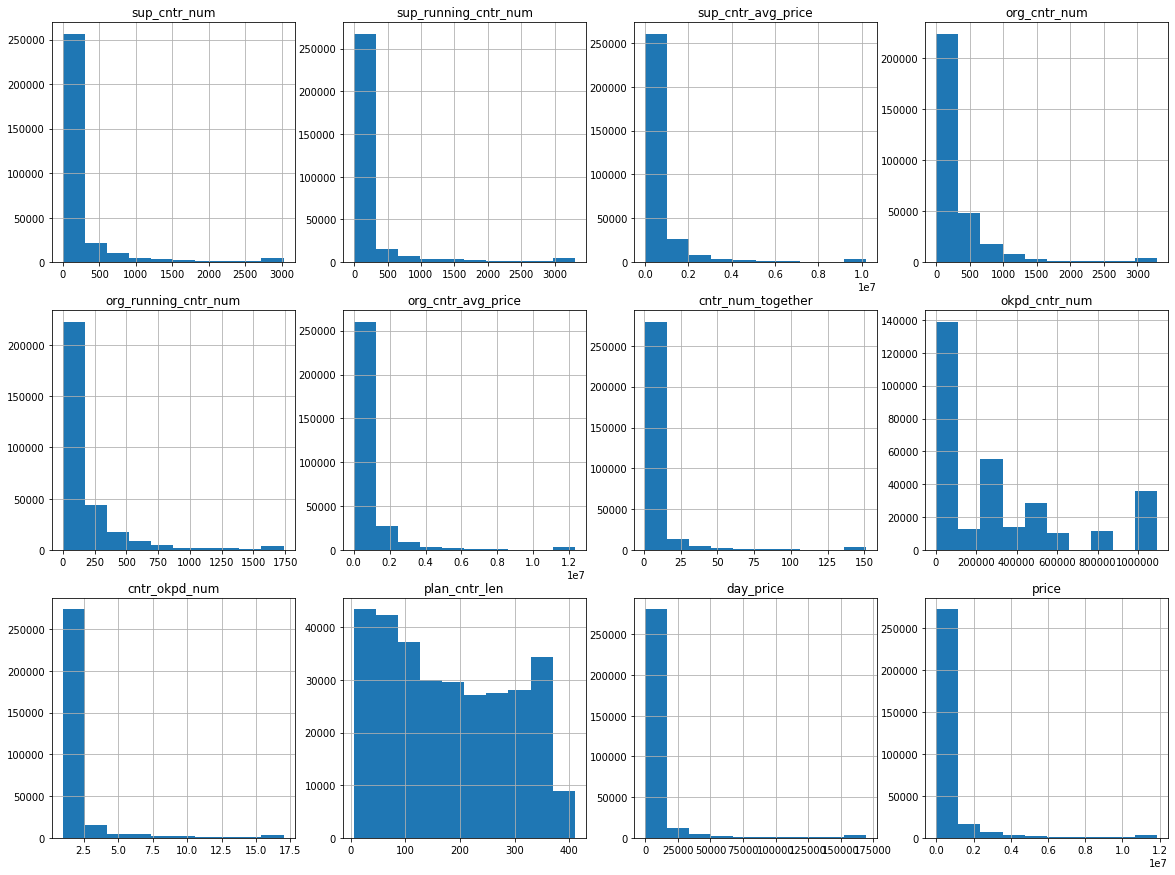

In [19]:
gpa_analysis.plot_histograms(num_var, data)

**Findings:**
- All variables except `plan_cntr_len` are positive skewed in [1, 99] percentiles. This should be preprocessed, e.g. with logarithmic transformation

In [20]:
# Model independent test to rate feature importance (ANOVA test)
res_df, res_list = gpa_analysis.rate_feature_importance(
    data[num_var].values, 
    data.cntr_result.values, 
    [f_classif], 
    ['f_score'], 
    num_var
)
res_df

,var_name,f_score
0,plan_cntr_len,5368
1,okpd_cntr_num,3567
2,sup_running_cntr_num,2751
3,org_running_cntr_num,2366
4,org_cntr_num,1961
5,cntr_okpd_num,1155
6,sup_cntr_num,846
7,cntr_num_together,777
8,org_cntr_avg_price,21
9,price,10


**Findings:**
- `plan_cntr_len`, `okpd_cntr_num`, `sup_running_cntr_num` are features with highest impact on target variable
- `day_price`, `pmp`, `sup_cntr_avg_price` has lowest impact on target variable

#### Let's apply logarithmic transformation and then conduct correlation analysis and ANOVA test again

In [21]:
for var in num_var:
    # Set the lowest value equal to 1
    data[var] = data[var].clip(lower=1)
    
    # Logarithmic transformation
    data[var] = np.log(data[var])

In [22]:
# Correlation matrix after logarithmic transformation
data[num_var].corr() 

,sup_cntr_num,sup_running_cntr_num,sup_cntr_avg_price,org_cntr_num,org_running_cntr_num,org_cntr_avg_price,cntr_num_together,okpd_cntr_num,cntr_okpd_num,plan_cntr_len,day_price,price
sup_cntr_num,1.000,0.911,0.029,-0.122,-0.109,-0.232,0.447,0.289,0.060,0.208,-0.259,-0.184
sup_running_cntr_num,0.911,1.000,0.038,-0.166,-0.114,-0.239,0.330,0.263,0.040,0.225,-0.256,-0.172
sup_cntr_avg_price,0.029,0.038,1.000,-0.078,-0.063,0.488,0.018,-0.034,-0.048,0.045,0.629,0.716
org_cntr_num,-0.122,-0.166,-0.078,1.000,0.867,0.150,0.379,0.194,-0.007,-0.054,0.001,-0.026
org_running_cntr_num,-0.109,-0.114,-0.063,0.867,1.000,0.161,0.325,0.207,-0.003,-0.035,-0.002,-0.020
org_cntr_avg_price,-0.232,-0.239,0.488,0.150,0.161,1.000,0.011,-0.104,-0.060,-0.065,0.523,0.545
cntr_num_together,0.447,0.330,0.018,0.379,0.325,0.011,1.000,0.245,0.013,-0.007,-0.077,-0.089
okpd_cntr_num,0.289,0.263,-0.034,0.194,0.207,-0.104,0.245,1.000,0.120,0.031,-0.105,-0.101
cntr_okpd_num,0.060,0.040,-0.048,-0.007,-0.003,-0.060,0.013,0.120,1.000,-0.029,0.042,0.033
plan_cntr_len,0.208,0.225,0.045,-0.054,-0.035,-0.065,-0.007,0.031,-0.029,1.000,-0.424,0.022


**Findings:**
- Strong positive correlation
    - `corr(org_cntr_avg_price, price)` = 0.55 (was 0.63)
    - `corr(day_price, sup_cntr_avg_price)` = 0.63 (was 0.15)
- Very strong positive correlation
    - `corr(sup_running_cntr_num, sup_cntr_num`) = 0.91 (was 0.82)
    - `corr(day_price, price)` = 0.9 (was 0.48)
    - `corr(org_running_cntr_num, org_cntr_num)` = 0.87 (was 0.69)

In [23]:
data[num_var].corrwith(data.cntr_result)

sup_cntr_num            0.147
sup_running_cntr_num    0.181
sup_cntr_avg_price      0.048
org_cntr_num           -0.184
org_running_cntr_num   -0.141
org_cntr_avg_price     -0.089
cntr_num_together      -0.027
okpd_cntr_num          -0.045
cntr_okpd_num           0.084
plan_cntr_len           0.149
day_price              -0.019
price                   0.052
dtype: float64

**Findings:**
- Neglifible correlation
    - `sup_cntr_num` = 0.15 (was 0.05)
    - `sup_running_cntr_num` = 0.18 (was 0.09)
    - `org_cntr_num` = 0.18 (was -0.08)
    - `org_running_cntr_num` = 0.14 (was -0.09)
    - `org_running_cntr_num` = 0.15 (was 0.13)

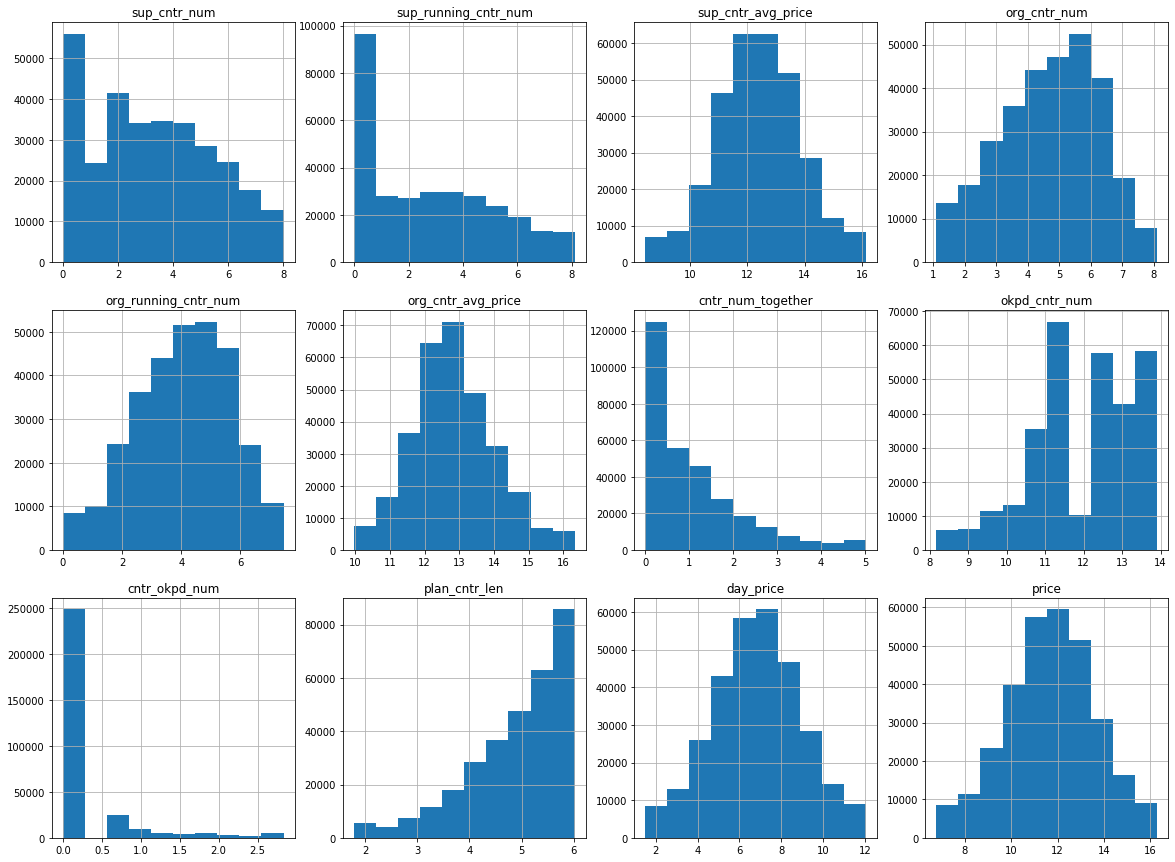

In [24]:
gpa_analysis.plot_histograms(num_var, data)

**Findings:**
- The disctributions are much better now

![title](png/outliers_ln_num_var.png)

**Findings:**
- Still there is a lot outliers 

In [25]:
# Model independent test to rate feature importance (ANOVA test)
res_df, res_list = gpa_analysis.rate_feature_importance(
    data[num_var].values, 
    data.cntr_result.values, 
    [f_classif], 
    ['f_score'], 
    num_var
)
res_df

,var_name,f_score
0,org_cntr_num,10785
1,sup_running_cntr_num,10425
2,plan_cntr_len,6987
3,sup_cntr_num,6789
4,org_running_cntr_num,6223
5,org_cntr_avg_price,2473
6,cntr_okpd_num,2182
7,price,848
8,sup_cntr_avg_price,721
9,okpd_cntr_num,633


**Findings:**
- `plan_cntr_len`, `org_cntr_num`, `sup_running_cntr_num` are features with highest impact on target variable
- `day_price`, `cntr_num_together`, `okpd_cntr_num` has lowest impact on target variable

### Categorical binary variables 

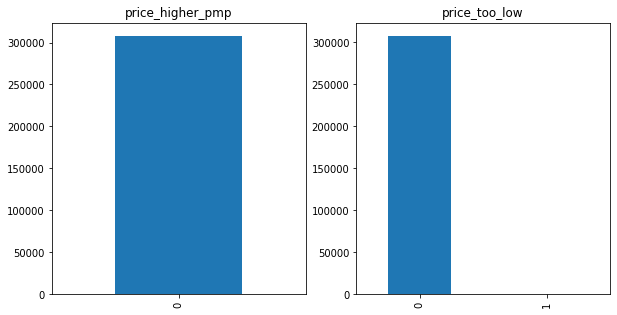

In [26]:
fig = plt.figure(figsize=(10, 5))
for idx, cb in enumerate(cat_bin_var[:2]):
    ax = fig.add_subplot(1, 2, idx + 1)
    data[cb].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(cb)

**Findings:**
- `price_higher_pmp` has only one value - useless variable
- `prive_too_low` has only 2 values differing from '0' - useless variable

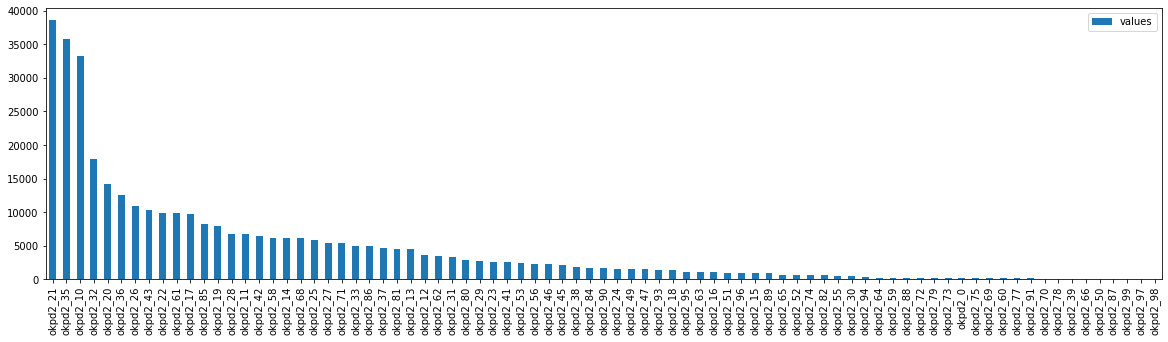

In [27]:
# Frequency distribtion for shortened OKPD
okpd2_vars = [var for var in cat_bin_var if var.startswith('okpd2_')]
values = []

for var in okpd2_vars:
    values.append(data[var].value_counts().values[1])
    
res = pd.DataFrame({'clmn_name': okpd2_vars, 'values': values})
res = res.sort_values(by='values', ascending=False)

ax = plt.figure(figsize=(20, 5)).gca()
res.plot(kind='bar', ax=ax)
ax.set_xticklabels(res.clmn_name.values)
plt.show()

**Findings:**
- `okpd2_21` is the most frequent value. This value corresponds to "Medicines and materials used for medical purposes"
- `okpd2_35`, `okpd2_10`, `okpd2_32`, `okpd2_20`, `okpd2_36` 5 next popular values which correspond to: 
    - "Electricity, gas, steam and air conditioning", 
    - "Food products", 
    - "Other finished products", 
    - "Chemicals", 
    - "Natural water; water purification and water supply services".
- There is very a few cases when okpd variable was not defined in database (`okpd2_0`)

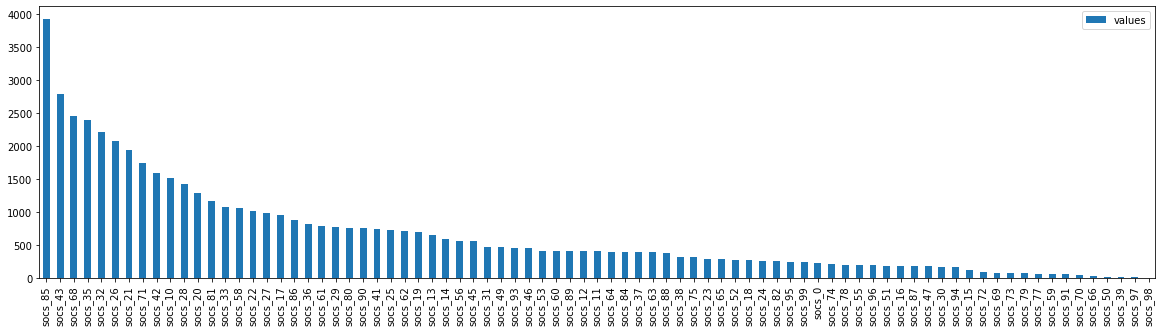

In [28]:
# Frequency distribution for socs_ variables (share of contract of supplier with given OKPD)
socs_vars = [var for var in cat_bin_var if var.startswith('socs_')]
values = []

for var in socs_vars:
    values.append(data[var].value_counts().values[1])
    
res = pd.DataFrame({'clmn_name': socs_vars, 'values': values})
res = res.sort_values(by='values', ascending=False)

ax = plt.figure(figsize=(20, 5)).gca()
res.plot(kind='bar', ax=ax)
ax.set_xticklabels(res.clmn_name.values)
plt.show()

**Findings:**
- `socs_85`, `socs_43`, `socs_68`, `socs_35`, `socs_32` - Top 5 industries popular among suppliers, in other words,  industries with the largest number of suppliers. These variables correspond to:
    - "Education services"
    - "Specialized construction works"
    - "Real estate services"
    - "Electricity, gas, steam and air conditioning"
    - "Other finished products"
- `okpd2_10`, `okpd2_11`, `okpd2_12`, `okpd2_13`, `okpd2_14` 5 next popular values which correspond to 
    - food, 
    - beverages, 
    - tobacco, 
    - textile, 
    - clothes.
- There is very a few cases when supplier-okpd-contract-share was not defined in database (`socs_0`)

### Other categorical variables

In [29]:
# Number of unique variables
for cv in cat_var:
    print(cv, len(np.unique(data[~data[cv].isnull()][cv])))

sup_ter 23
org_type 12
org_ter 55
sign_month 12
sign_quarter 4
purch_type 12
cntr_lvl 4


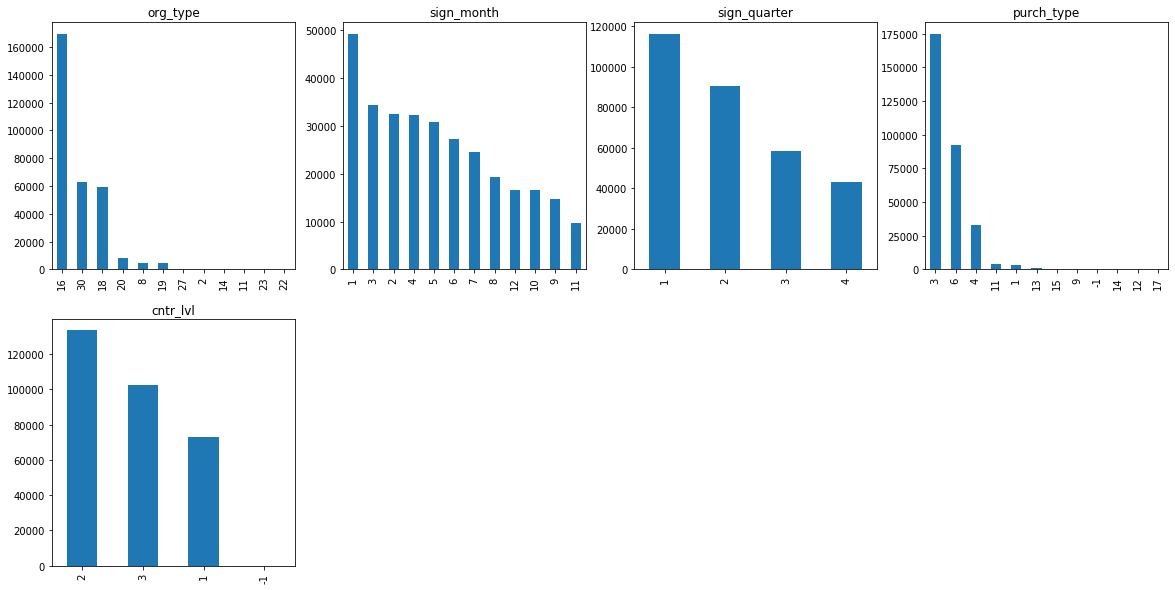

In [30]:
# Frequency distribution for variables with less than 13 unique values
fig = plt.figure(figsize=(20, 10))
for idx, cv in enumerate(['org_type', 'sign_month', 'sign_quarter', 'purch_type', 'cntr_lvl']):
    ax = fig.add_subplot(2, 4, idx + 1)
    data[cv].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(cv)

**Findings:**
- `purch_type` and `cntr_lvl` has undefined values (-1). This values should be preprocessed.
- Most of contracts are signed in 1st quarter
- Regional contracts are the most frequent level of contract

In [31]:
# Change undefined values to most popular values
data.loc[data.purch_type == -1, 'purch_type'] = data.purch_type.mode()[0]
data.loc[data.cntr_lvl == -1, 'cntr_lvl'] = data.cntr_lvl.mode()[0]

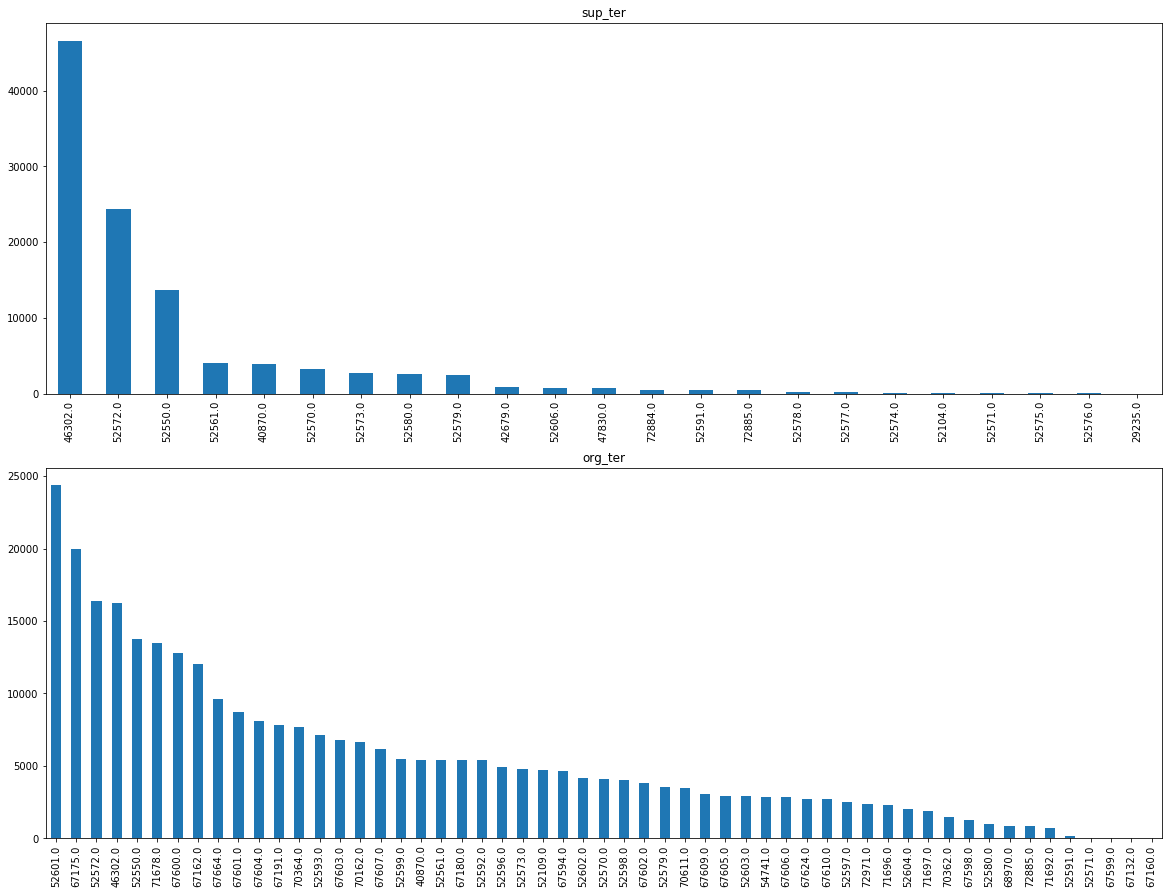

In [32]:
fig = plt.figure(figsize=(20, 15))
for idx, cv in enumerate(['sup_ter', 'org_ter']):
    ax = fig.add_subplot(2, 1, idx + 1)
    data[cv].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(cv)

In [33]:
sup_ter_nan = data.sup_ter.isna().sum()
org_ter_nan = data.org_ter.isna().sum()

print('NaN values for `sup_ter`: {}, share in total sample {:.2f}'.format(
    sup_ter_nan, sup_ter_nan / data.shape[0]))
print('NaN values for `org_ter`: {}, share in total sample: {:.2f}'.format(
    org_ter_nan, org_ter_nan / data.shape[0]))

NaN values for `sup_ter`: 199664, share in total sample 0.65
NaN values for `org_ter`: 3624, share in total sample: 0.01


**Findings:**
- `sup_ter` has empty values in 65% cases. Let's group NaN values in one group (Nan => 1) and check if this variable is useful
- `org_ter` has empty values in 1% cases. Let's change NaN value to most popular value of varible  

In [34]:
# Change NaN to 1, so that some following functions work
data.loc[data.sup_ter.isna(), 'sup_ter'] = 1

# Change NaN to most popular value
data.loc[data.org_ter.isna(), 'org_ter'] = data.org_ter.mode()[0]

In [35]:
res_df, res_list = gpa_analysis.rate_feature_importance(
    data[cat_var].values,
    data.cntr_result.values, 
    [chi2], 
    ['chi^2'],
    cat_var, 
)
res_df

,var_name,chi^2
0,sup_ter,60155838
1,org_ter,867140
2,sign_month,40398
3,sign_quarter,9627
4,purch_type,4865
5,org_type,1729
6,cntr_lvl,1355


**Findings:**
- `sup_ter`, `org_ter`, `sign_month` are features that may have big impact on target variable

In [36]:
gpa_analysis.calculate_information_value(cat_var, data)

sup_ter: 0.072
org_type: 0.031
org_ter: 0.166
sign_month: 0.401
sign_quarter: 0.366
purch_type: 0.186
cntr_lvl: 0.149


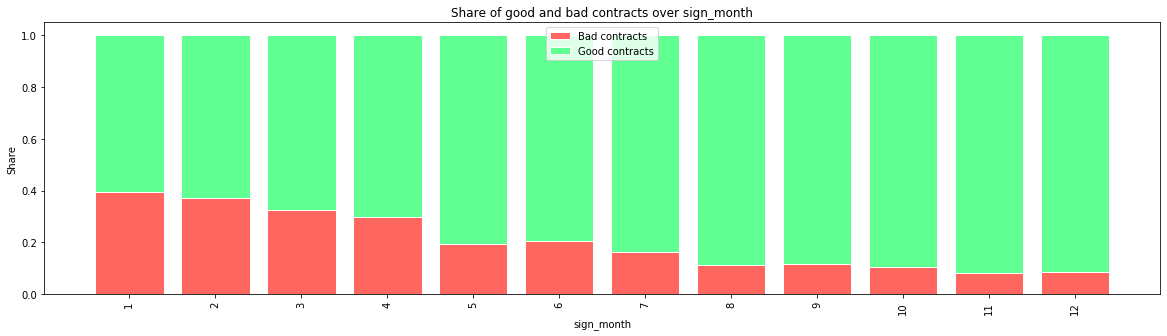

In [37]:
gpa_analysis.cntr_distrib_over_cat_var(data, 'sign_month')

**Findings:**
- `sup_ter`, `org_type` - weak prediction power
- `org_ter`, `purch_type`, `cntr_lvl` - medium prediction power
- `sign_month`, `sign_quarter` - strong prediction power

In [38]:
%%time
gpa_analysis.calculate_information_value(cat_bin_var[2:], data, print_only_important=True)

okpd2_10: 0.229
okpd2_21: 0.119
okpd2_35: 0.131
socs_10: 0.237
socs_11: 0.141
socs_17: 0.103
socs_20: 0.101
socs_21: 0.151
socs_22: 0.104
socs_35: 0.154
CPU times: user 19min 19s, sys: 1min 16s, total: 20min 36s
Wall time: 20min 19s


**Findings:**

Highest (in this case medium) prediction power among `okpd2_...`
- `okpd2_10` (food) 
- `okpd2_21` (medicines and materials used for medical purposes)
- `okpd2_35` (electricity, gas, steam and air conditioning)

Highest (in this case medium) prediction power among `socs_...`
- `socs_10` (food) 
- `socs_11` (beverages) 
- `socs_17` (paper and paper products)
- `socs_20` (chemicals) 
- `socs_21` (medicines and materials used for medical purposes) 
- `socs_22` (rubber and plastic products)
- `socs_35` (electricity, gas, steam and air conditioning)